# CSC345 Object Recognition Coursework

## Vidhi Pala - 978174

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage.feature
from sklearn import preprocessing, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

In [2]:
# Load data
trn_images = np.load('trnImage.npy')
trn_labels= np.load('trnLabel_coarse.npy')

tst_images = np.load('tstImage.npy')
tst_labels = np.load('tstLabel_coarse.npy')

label = pd.read_csv('coarse_labels.csv', sep=',')

print(trn_images)

[[[[1.         1.         0.98039216 ... 0.972549   0.6117647
    0.12156863]
   [1.         1.         0.98039216 ... 0.95686275 0.6039216
    0.2627451 ]
   [1.         1.         0.972549   ... 0.9490196  0.5372549
    0.47843137]]

  [[1.         0.99215686 0.972549   ... 0.9411765  0.5921569
    0.11764706]
   [1.         0.99215686 0.9764706  ... 0.9098039  0.57254905
    0.26666668]
   [1.         0.99215686 0.9529412  ... 0.8745098  0.48235294
    0.4862745 ]]

  [[1.         0.99215686 0.96862745 ... 0.9254902  0.5921569
    0.12156863]
   [1.         0.99215686 0.972549   ... 0.9098039  0.5647059
    0.27058825]
   [1.         0.99215686 0.9372549  ... 0.8745098  0.49019608
    0.49411765]]

  ...

  [[0.7647059  0.99215686 0.98039216 ... 0.9137255  0.60784316
    0.1254902 ]
   [0.8039216  0.99215686 0.98039216 ... 0.8980392  0.5882353
    0.27450982]
   [0.75686276 0.99215686 0.9647059  ... 0.87058824 0.5058824
    0.5058824 ]]

  [[0.83137256 0.99215686 0.98039216 ... 0.90

In [3]:
#HOG feature extraction
trn_features = np.zeros([50000, 324])
tst_features = np.zeros([10000, 324])

def getFeatures(image):
  features = skimage.feature.hog(image)
  return features

for i in range (50000):
  trn_features[i,:] = getFeatures(trn_images[:,:,:,i])

for i in range (10000):
  tst_features[i,:] = getFeatures(tst_images[:,:,:,i])

In [4]:
labels_super = []

for i in range (0, 20):
  labels_super.append(i)

### Standardisation

In [5]:
normaliser = StandardScaler()
trn_features_s = normaliser.fit_transform(trn_features)
tst_features_s = normaliser.transform(tst_features)

### Support Vector Machine

In [6]:
%%time
svc = SVC(kernel='rbf')
svc.fit(trn_features_s, trn_labels)

CPU times: user 12min 41s, sys: 36.8 s, total: 13min 18s
Wall time: 17min 35s


SVC()

In [7]:
score = svc.score(tst_features_s, tst_labels)
score = score*100
score = str(round(score, 2))
print("Coarse Accuracy: ", score, "%")

Coarse Accuracy:  40.15 %


In [8]:
predictedLabels = svc.predict(tst_features_s)

Text(0.5, 1.0, 'SVM Predictions')

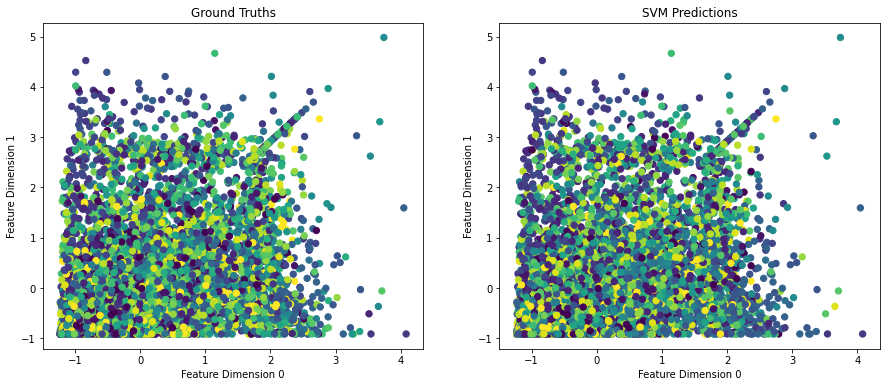

In [9]:
svm_fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
ax1.scatter(tst_features_s[:,0], tst_features_s[:,1], 40, tst_labels)
ax2.scatter(tst_features_s[:,0], tst_features_s[:,1], 40, predictedLabels)
ax1.set_xlabel('Feature Dimension 0')
ax1.set_ylabel('Feature Dimension 1')
ax1.set_title('Ground Truths')
ax2.set_xlabel('Feature Dimension 0')
ax2.set_ylabel('Feature Dimension 1')
ax2.set_title('SVM Predictions')

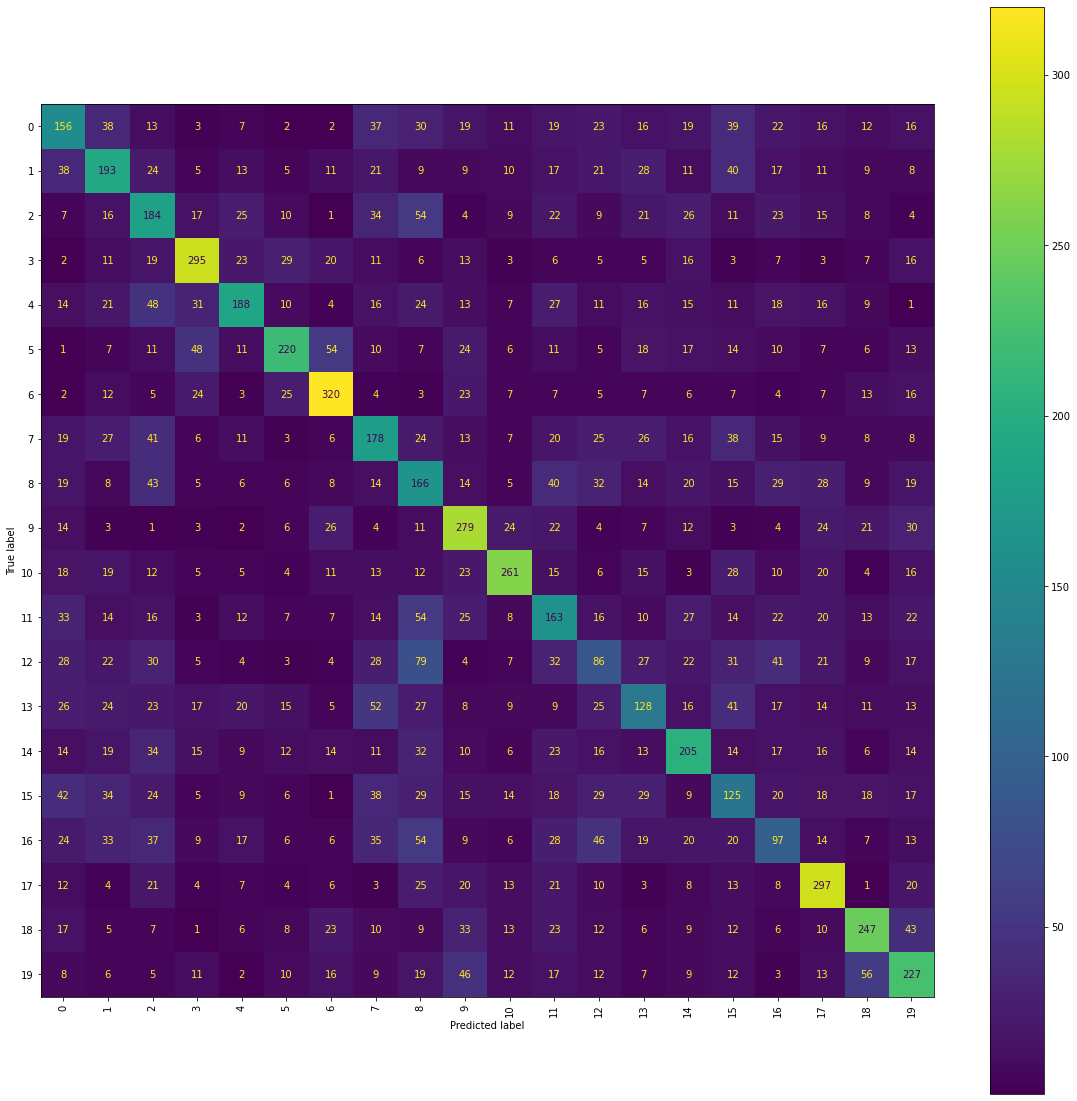

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))
svm_matrix = confusion_matrix(tst_labels, predictedLabels, labels=labels_super)
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_matrix, display_labels=labels_super)
svm_disp = svm_disp.plot(include_values = True, cmap='viridis', xticks_rotation='vertical', ax=ax)

### Neural Network

In [11]:
nn_model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(trn_labels)), activation=tf.nn.softmax)])


nn_model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [12]:
%%time
nn_history = nn_model.fit(trn_features_s, trn_labels, epochs = 50, validation_data=(tst_features_s, tst_labels))

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.4470 - sparse_categorical_accuracy: 0.2467 - val_loss: 2.3010 - val_sparse_categorical_accuracy: 0.2905
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2315 - sparse_categorical_accuracy: 0.3091 - val_loss: 2.2340 - val_sparse_categorical_accuracy: 0.3048
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.1673 - sparse_categorical_accuracy: 0.3301 - val_loss: 2.2119 - val_sparse_categorical_accuracy: 0.3189
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.1330 - sparse_categorical_accuracy: 0.3385 - val_loss: 2.1875 - val_sparse_categorical_accuracy: 0.3232
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.1072 - sparse_categorical_accuracy: 0.3458 - val_loss: 2.1891 - val_sparse_categorical_accuracy: 0.3271
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0877 - spars

In [13]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                10400     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 20)                1300      
                                                                 
Total params: 13,812
Trainable params: 13,812
Non-trainable params: 0
_________________________________________________________________


In [14]:
nn_loss, nn_acc = nn_model.evaluate(tst_features_s, tst_labels)
nn_acc = nn_acc * 100
nn_acc = str(round(nn_acc, 2))
print("Accuracy: ", nn_acc, "%")

313/313 [==============================] - 0s 1ms/step - loss: 2.1917 - sparse_categorical_accuracy: 0.3320
Accuracy:  33.2 %


In [15]:
predictLabels2 = np.argmax(nn_model.predict(tst_features_s), axis=1)

Text(0.5, 1.0, 'Ground Truth')

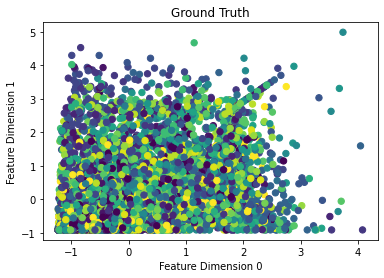

In [16]:
plt.scatter(tst_features_s[:,0], tst_features_s[:,1],40, c=tst_labels)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')

Text(0.5, 1.0, 'NN Prediction')

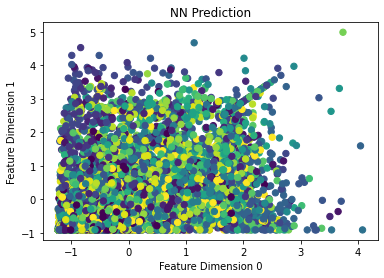

In [42]:
plt.scatter(tst_features_s[:,0], tst_features_s[:,1],40, c=predictLabels2)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('NN Prediction')

Text(0.5, 1.0, 'Accuracy Curves')

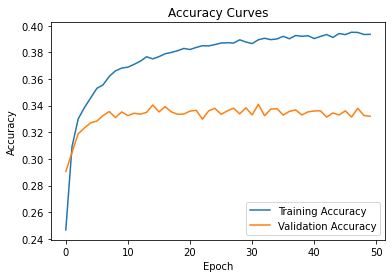

In [18]:
plt.plot(nn_history.history['sparse_categorical_accuracy'])
plt.plot(nn_history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

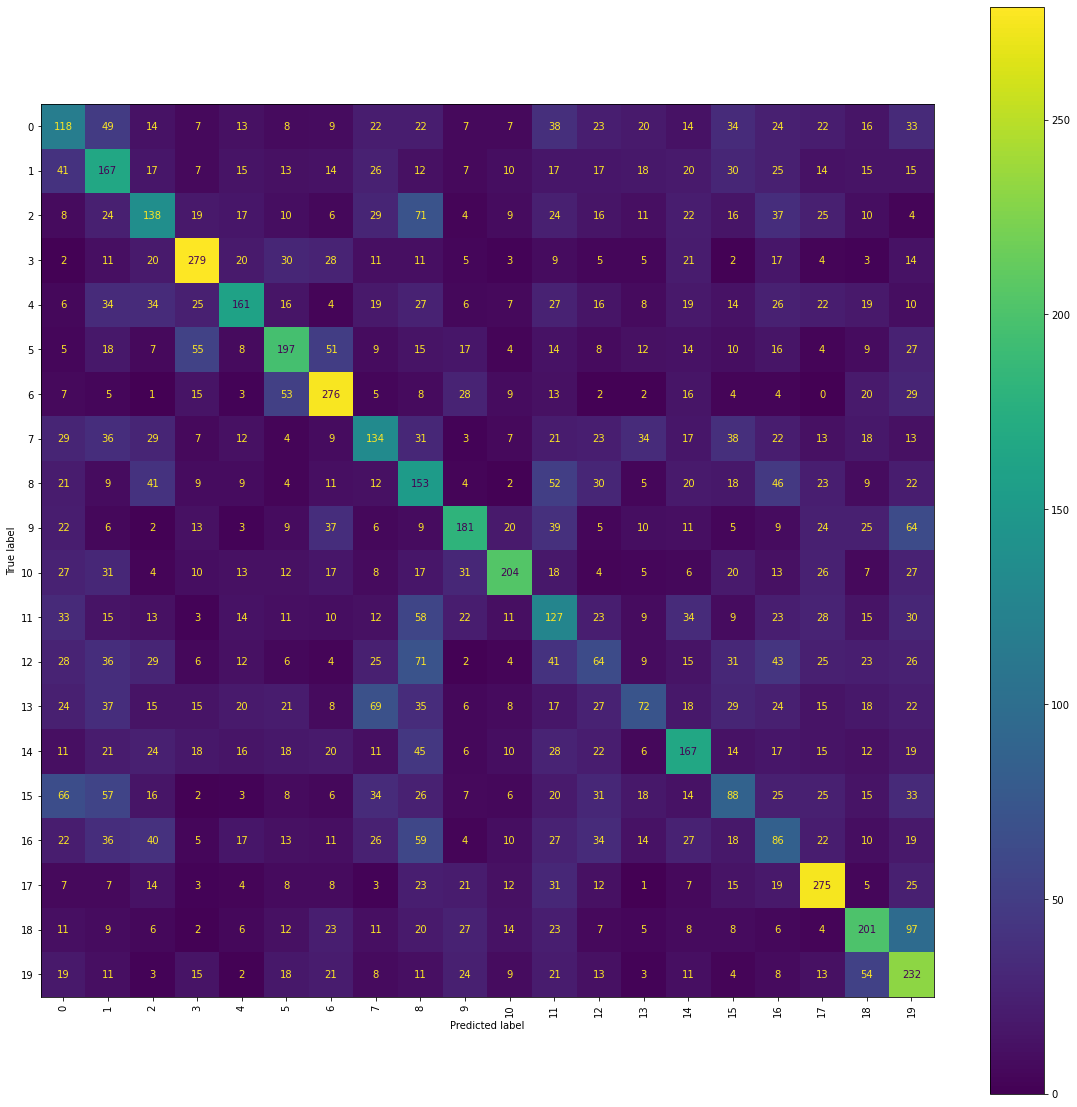

In [19]:
fig, ax = plt.subplots(figsize=(20, 20))
nn_matrix = confusion_matrix(tst_labels, predictLabels2, labels=labels_super)
nn_disp = ConfusionMatrixDisplay(confusion_matrix=nn_matrix, display_labels=labels_super)
nn_disp = nn_disp.plot(include_values = True, cmap='viridis', xticks_rotation='vertical', ax=ax)

### Principle Compnent Analysis

In [4]:
pca = PCA()
training_pca = pca.fit_transform(trn_features_s)
testing_pca = pca.transform(tst_features_s)

NameError: name 'trn_features_s' is not defined

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

In [49]:
# Setting PCA n_components to 137 based on graph and caluculation above
cum_sum = np.cumsum(pca.explained_variance_ratio_)

count = -1
score = 0
while score < 0.99:
    count += 1
    score = cum_sum[count]
    
print(count)

137


In [50]:
pca = PCA(n_components=137)
training_pca = pca.fit_transform(trn_features_s)
testing_pca = pca.transform(tst_features_s)

### Support Vector Machine with PCA

In [27]:
%%time
svc_pca = SVC(kernel='rbf')
svc_pca.fit(training_pca, trn_labels)

CPU times: user 6min 55s, sys: 6.33 s, total: 7min 2s
Wall time: 7min 29s


SVC()

In [28]:
score = svc_pca.score(testing_pca, tst_labels)
score = score*100
score = str(round(score, 2))
print("Coarse Accuracy: ", score, "%")

Coarse Accuracy:  40.06 %


In [29]:
predictedLabels3 = svc_pca.predict(testing_pca)

Text(0.5, 1.0, 'SVM with PCA Predictions')

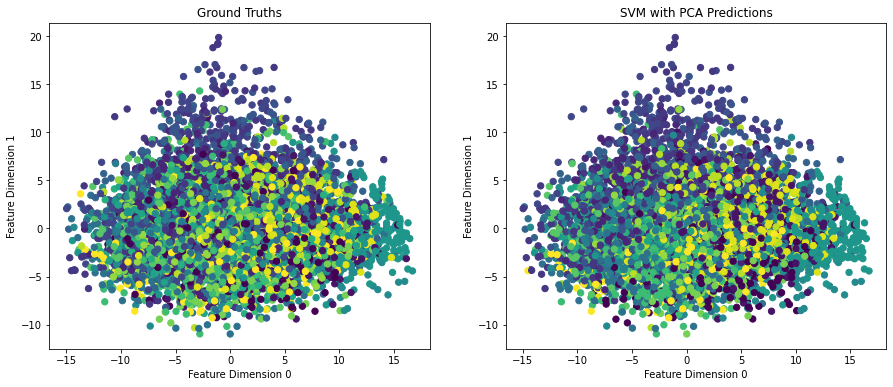

In [30]:
svm_fig_pca, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
ax1.scatter(testing_pca[:,0], testing_pca[:,1], 40, tst_labels)
ax2.scatter(testing_pca[:,0], testing_pca[:,1], 40, predictedLabels3)
ax1.set_xlabel('Feature Dimension 0')
ax1.set_ylabel('Feature Dimension 1')
ax1.set_title('Ground Truths')
ax2.set_xlabel('Feature Dimension 0')
ax2.set_ylabel('Feature Dimension 1')
ax2.set_title('SVM with PCA Predictions')

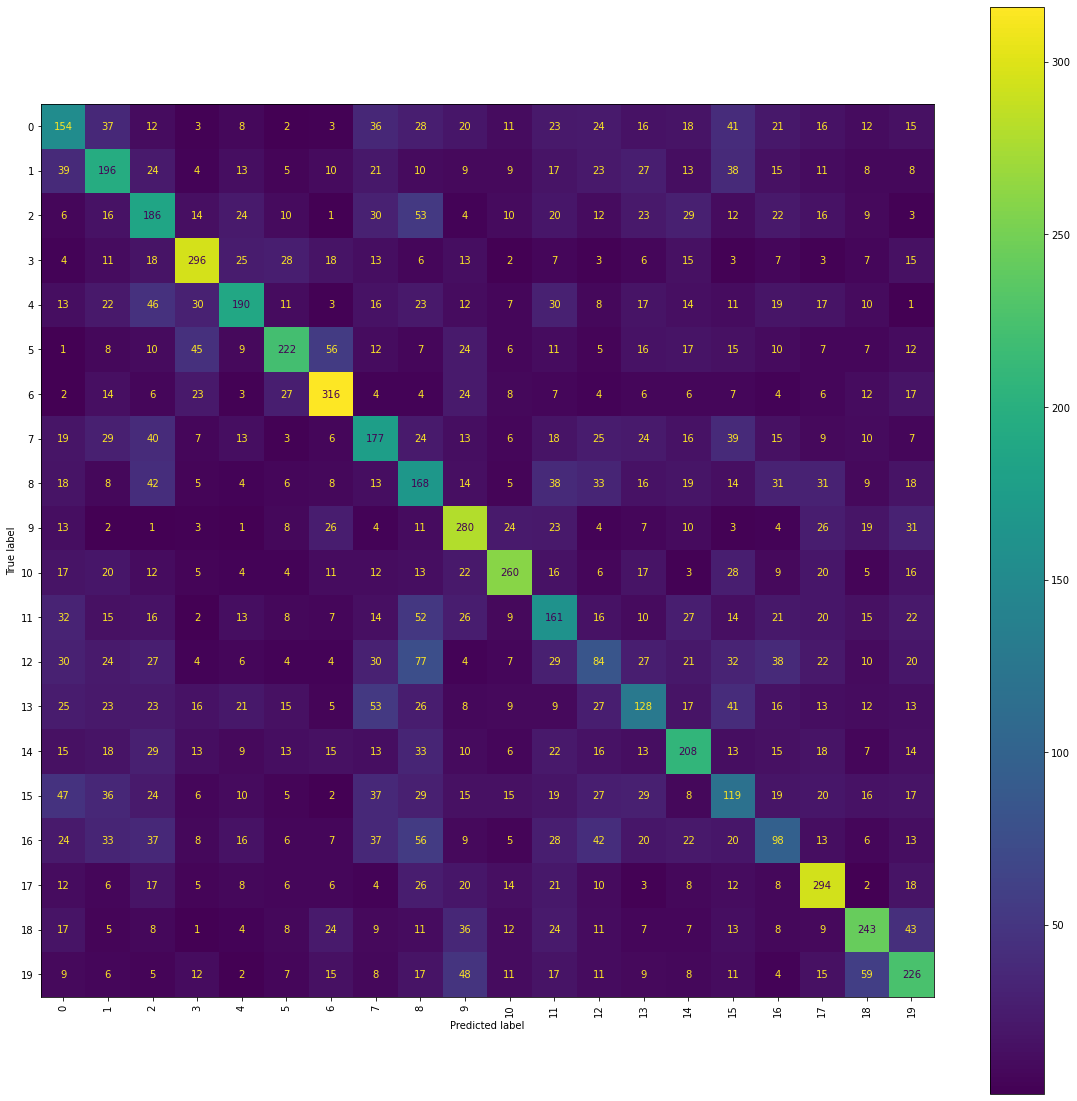

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
svm_matrix_pca = confusion_matrix(tst_labels, predictedLabels3, labels=labels_super)
svm_disp_pca = ConfusionMatrixDisplay(confusion_matrix=svm_matrix_pca, display_labels=labels_super)
svm_disp_pca = svm_disp_pca.plot(include_values = True, cmap='viridis', xticks_rotation='vertical', ax=ax)

### Neural Network with PCA

In [32]:
nn_pca_model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(trn_labels)), activation=tf.nn.softmax)])

nn_pca_model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [33]:
%%time
nn_pca_history = nn_pca_model.fit(training_pca, trn_labels, epochs = 50, validation_data=(testing_pca, tst_labels))

Epoch 1/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.5692 - sparse_categorical_accuracy: 0.2099 - val_loss: 2.3731 - val_sparse_categorical_accuracy: 0.2700
Epoch 2/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2905 - sparse_categorical_accuracy: 0.2950 - val_loss: 2.2831 - val_sparse_categorical_accuracy: 0.2966
Epoch 3/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2098 - sparse_categorical_accuracy: 0.3167 - val_loss: 2.2485 - val_sparse_categorical_accuracy: 0.3049
Epoch 4/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1644 - sparse_categorical_accuracy: 0.3290 - val_loss: 2.2199 - val_sparse_categorical_accuracy: 0.3173
Epoch 5/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1335 - sparse_categorical_accuracy: 0.3393 - val_loss: 2.2065 - val_sparse_categorical_accuracy: 0.3210
Epoch 6/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1116 - spars

In [34]:
nn_pca_loss, nn_pca_acc = nn_pca_model.evaluate(testing_pca, tst_labels)
nn_pca_acc = nn_pca_acc * 100
nn_pca_acc = str(round(nn_pca_acc, 2))
nn_pca_loss = str(round(nn_pca_loss, 2))
print("Accuracy: ", nn_pca_acc, "%")

313/313 [==============================] - 0s 907us/step - loss: 2.2150 - sparse_categorical_accuracy: 0.3244
Accuracy:  32.44 %


In [35]:
predictLabels4 = np.argmax(nn_pca_model.predict(testing_pca), axis=1)

In [36]:
nn_pca_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                4416      
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 20)                1300      
                                                                 
Total params: 7,828
Trainable params: 7,828
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Ground Truth')

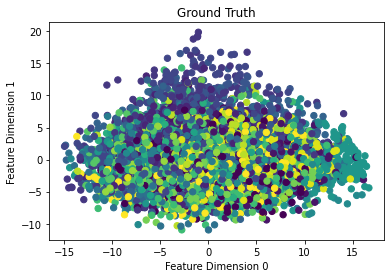

In [37]:
plt.scatter(testing_pca[:,0], testing_pca[:,1],40, c=tst_labels)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')

Text(0.5, 1.0, 'Ground Truth')

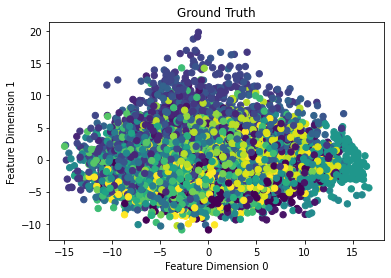

In [38]:
plt.scatter(testing_pca[:,0], testing_pca[:,1],40, c=predictLabels4)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')

Text(0.5, 1.0, 'Accuracy Curves')

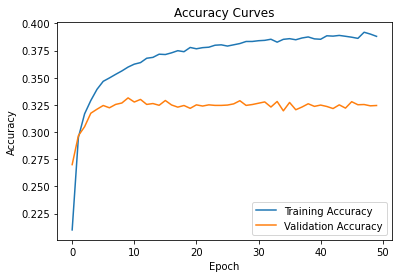

In [39]:
plt.plot(nn_pca_history.history['sparse_categorical_accuracy'])
plt.plot(nn_pca_history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

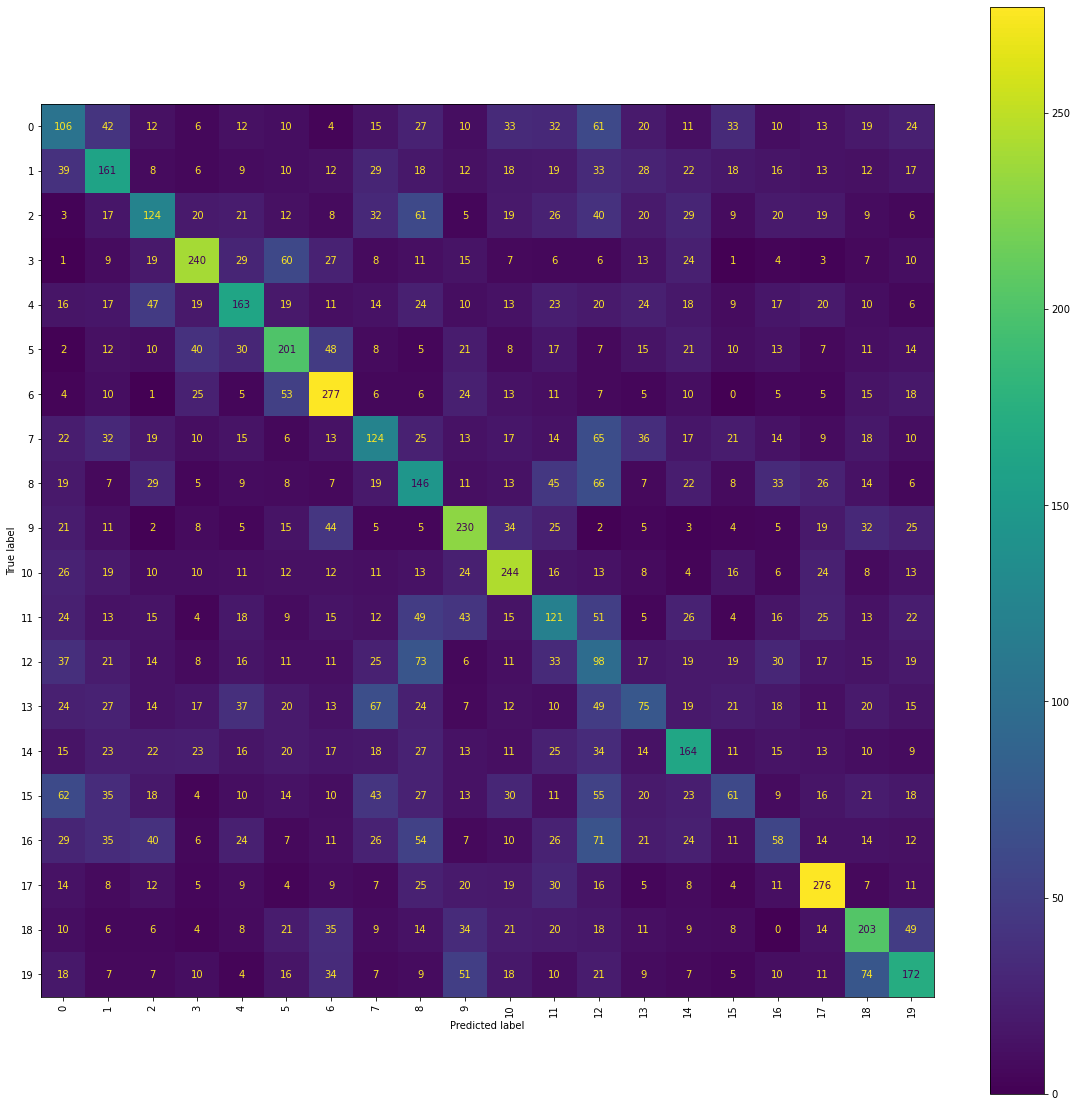

In [40]:
fig, ax = plt.subplots(figsize=(20, 20))
nn_matrix_pca = confusion_matrix(tst_labels, predictLabels4, labels=labels_super )
nn_disp_pca = ConfusionMatrixDisplay(confusion_matrix=nn_matrix_pca, display_labels=labels_super)
nn_disp_pca = nn_disp_pca.plot(include_values = True, cmap='viridis', xticks_rotation='vertical', ax=ax)